In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets

In [2]:
data_tr = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
#trainData ~ X_train ,testData~ X_test, trainLabel~ y_train
#testLabel~ y_test, valData ~ X_val, valLabels~ y_val
X = data_tr.drop('label', axis=1).values
y = data_tr['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('X_train', X_train.shape)

X_train (31500, 784)


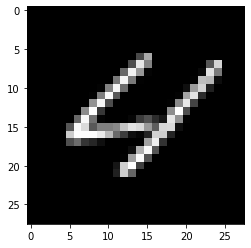

In [20]:
image = X[4550].reshape((28,28))
plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

In [24]:
def euclidean (p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))
euclidean(np.array([1,2,3]), np.array([7,8,9]))

10.392304845413264

In [10]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [11]:
print(confusion_matrix(y_test, knn_pred))

[[1020    0    0    0    0    0    2    0    1    2]
 [   0 1144    0    0    1    0    0    1    0    0]
 [  10    9 1021    6    4    2    2   15    1    2]
 [   0    2    4 1101    0   18    0    8   11    7]
 [   2    5    0    0  987    0    5    3    0   22]
 [   1    0    0   11    1  862   10    1    6    6]
 [   7    2    0    1    0    3  995    0    2    0]
 [   0   16    4    1    2    0    0 1095    0   17]
 [   1    9    6   14    1   14    3    2  947    8]
 [   5    2    0   10   15    0    1   16    0  985]]


In [12]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1025
           1       0.96      1.00      0.98      1146
           2       0.99      0.95      0.97      1072
           3       0.96      0.96      0.96      1151
           4       0.98      0.96      0.97      1024
           5       0.96      0.96      0.96       898
           6       0.98      0.99      0.98      1010
           7       0.96      0.96      0.96      1135
           8       0.98      0.94      0.96      1005
           9       0.94      0.95      0.95      1034

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



In [13]:
print(accuracy_score(y_test, knn_pred))

0.9673333333333334


In [16]:
k_val = range(1, 10, 2)
k_score = []
for k in k_val:
    model = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(model, X, y, cv = 10, scoring ='accuracy')
    k_score.append(score.mean())
    print(k_score)

[0.9674047619047619]
[0.9674047619047619, 0.9683095238095237]
[0.9674047619047619, 0.9683095238095237, 0.9673809523809525]
[0.9674047619047619, 0.9683095238095237, 0.9673809523809525, 0.9664523809523811]
[0.9674047619047619, 0.9683095238095237, 0.9673809523809525, 0.9664523809523811, 0.9651190476190477]


In [17]:
model = KNeighborsClassifier(n_neighbors= k)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1025
           1       0.92      1.00      0.96      1146
           2       0.99      0.94      0.96      1072
           3       0.95      0.96      0.96      1151
           4       0.98      0.96      0.97      1024
           5       0.96      0.95      0.95       898
           6       0.97      0.98      0.98      1010
           7       0.96      0.96      0.96      1135
           8       0.99      0.92      0.95      1005
           9       0.94      0.95      0.94      1034

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500

